In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
	return 1/(1 + np.exp(-z))

# Produce a neural network randomly initialized
def initialize_parameters(n_x, n_h, n_y):
	W1 = np.random.randn(n_h, n_x)
	b1 = np.zeros((n_h, 1))
	W2 = np.random.randn(n_y, n_h)
	b2 = np.zeros((n_y, 1))

	parameters = {
	"W1": W1,
	"b1" : b1,
	"W2": W2,
	"b2" : b2}

	return parameters

# Evaluate the neural network
def forward_prop(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # Z value for Layer 1
  Z1 = np.dot(W1, X) + b1
  # Activation value for Layer 1
  A1 = np.tanh(Z1)
  # Z value for Layer 2
  Z2 = np.dot(W2, A1) + b2
  # Activation value for Layer 2
  A2 = sigmoid(Z2)

  cache = {
    "A1": A1,
    "A2": A2
  }
  return A2, cache

# Evaluate the error (i.e., cost) between the prediction made in A2 and the provided labels Y 
# We use the Mean Square Error cost function
def calculate_cost(A2, Y):
  # m is the number of examples
  cost = np.sum((0.5 * (A2 - Y) ** 2).mean(axis=1))/Y.shape[1]
  return cost

# Apply the backpropagation
def backward_prop(X, Y, cache, parameters):
  A1 = cache["A1"]
  A2 = cache["A2"]

  W2 = parameters["W2"]

  # Compute the difference between the predicted value and the real values
  dZ2 = A2 - Y
  dW2 = np.dot(dZ2, A1.T)/Y.shape[1]
  db2 = np.sum(dZ2, axis=1, keepdims=True)/Y.shape[1]
  # Because d/dx tanh(x) = 1 - tanh^2(x)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
  dW1 = np.dot(dZ1, X.T)/Y.shape[1]
  db1 = np.sum(dZ1, axis=1, keepdims=True)/Y.shape[1]

  grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
  }

  return grads

# Third phase of the learning algorithm: update the weights and bias
def update_parameters(parameters, grads, learning_rate):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2
  
  new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
  }

  return new_parameters

# model is the main function to train a model
# X: is the set of training inputs
# Y: is the set of training outputs
# n_x: number of inputs (this value impacts how X is shaped)
# n_h: number of neurons in the hidden layer
# n_y: number of neurons in the output layer (this value impacts how Y is shaped)
def model(X, Y,X_test,Y_test, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    cost_train = []
    cost_val = []
    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)
        cost = calculate_cost(a2, Y)
        grads = backward_prop(X, Y, cache, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)
        if(i%100 == 0):
            cost_train.append(cost)
            a, cache = forward_prop(X_test, parameters)
            cost1 = calculate_cost(a, Y_test)
            cost_val.append(cost1)
#             print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters, cost_train, cost_val 

# # Make a prediction
# # X: represents the inputs
# # parameters: represents a model
# # the result is the prediction
# def predict(X, parameters):
#   a2, cache = forward_prop(X, parameters)
#   yhat = a2
# #   print(yhat.shape)  
#   yhat = np.squeeze(yhat)

#   if(yhat >= 0.5):
#     y_predict = 1
#   else:
#     y_predict = 0

#   return y_predict

# # Set the seed to make result reproducible
# np.random.seed(42)

# # The 4 training examples by columns
# X = np.array([[0, 0, 1, 1],
#               [0, 1, 0, 1]])

# # The outputs of the XOR for every example in X
# Y = np.array([[0, 1, 1, 0]])

# # No. of training examples
# m = X.shape[1]

# # Set the hyperparameters
# n_x = 2     #No. of neurons in first layer
# n_h = 4     #No. of neurons in hidden layer
# n_y = 1     #No. of neurons in output layer

# #The number of times the model has to learn the dataset
# number_of_iterations = 1000
# learning_rate = 0.01

# # define a model 
# trained_parameters = model(X, Y, n_x, n_h, n_y, number_of_iterations, learning_rate)

# # Test 2X1 vector to calculate the XOR of its elements. 
# # You can try any of those: (0, 0), (0, 1), (1, 0), (1, 1)
# X_test = np.array([[0], [1]])
# y_predict = predict(X_test, trained_parameters)

# # Print the result
# print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
#     X_test[0][0], X_test[1][0], y_predict))


## Load Data

In [3]:
from sklearn.datasets import load_digits
dataset = load_digits()
X = dataset.data
# normalizer = normalize_dataset(dataset.data)
y = dataset.target
print("Data shape: ",X.shape)
print("label shape: ",y.shape)

Data shape:  (1797, 64)
label shape:  (1797,)


## Plot Data

label:  2


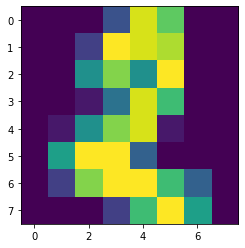

In [4]:

index = 2
plt.imshow(X[index,:].reshape([8,8]))
print("label: ",y[index])

## K-Fold separation
Lo separaremos una vez y luego haremos el entrenamiento. En cada entrenamiento del fold calcularemos la loss y accuracy

In [5]:
def concatenate_X_y(X,Y):
    """Method to concatenate labels and data, so it can be efectively shuffle 
    and then the corresponding data and labels are still in place."""
    return np.concatenate((X, Y.reshape([-1,1])), axis=1)
dataset_concatenated = concatenate_X_y(X,y)
np.random.shuffle(dataset_concatenated)
X = dataset_concatenated[:,:-1]
y = dataset_concatenated[:,-1]
print("Data shape: ",X.shape)
print("label shape: ",y.shape)

Data shape:  (1797, 64)
label shape:  (1797,)


In [6]:
def get_k_folded_datasets(X,Y,K_Fold = 5):
    lenght = len(y)
    Fold = 1.0/K_Fold
    X_Test = X[:int(lenght*Fold),:]
    X_Train = X[int(lenght*Fold):,:]
    Y_train = Y[int(lenght*Fold):]
    Y_test = Y[:int(lenght*Fold)]
    return X_Train,X_Test,Y_train,Y_test
X_train,X_test,y_train,y_test = get_k_folded_datasets(X,y)

In [7]:
print("shape train: ",X_train.shape)
print("shape train: ",X_test.shape)

shape train:  (1438, 64)
shape train:  (359, 64)


## Normalization

In [8]:
def normalize_dataset(X):
    norm = StandardScaler()
    X = norm.fit_transform(X)
    normalize_data(X,norm)

    return X,norm

def normalize_data(X,Normalizer):
    return Normalizer.transform(X)
    
    

In [9]:

X_train,normalizer = normalize_dataset(X_train)

X_test = normalize_data(X_test,normalizer)


## One-hot Encoding

In [10]:
def one_hot_encoding(Labels,Number_clases):
    labels = np.zeros([len(Labels),Number_clases],dtype=np.int64)
    for i,num in enumerate(Labels):
        labels[i,int(num)] = 1
    return labels
Y_train = one_hot_encoding(y_train,10)
Y_test = one_hot_encoding(y_test,10)

### Get Confusion matrix from prediccion and ground truth 

In [11]:
def get_confusion_matrix(Y,Y_pred,Classes):
    cm = np.zeros([Classes,Classes])
    for i in range(len(Y)):
        cm[Y[i],Y_pred[i]] += 1   
    return cm
def get_index(array):
    return (np.where(array==1))[0][0]

## Predict y evaluate

In [12]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    
    yhat = np.argmax(yhat, axis=0)
    return yhat

def train_and_evaluate(X_train,X_test,Y_train,Y_test,number_of_iterations = 150,N_h = 4):
    # Set the seed to make result reproducible
    np.random.seed(333)

    # Set the hyperparameters
    n_x = X_train.shape[1]     #No. of neurons in first layer
    n_h = N_h     #No. of neurons in hidden layer
    n_y = 10     #No. of neurons in output layer

    #The number of times the model has to learn the dataset
    
    learning_rate = 0.01
    # define a model 
    trained_parameters, cost_train, cost_val = model(X_train.transpose(), Y_train.transpose(),
                               X_test.transpose(),Y_test.transpose(),
                               n_x, n_h, n_y, number_of_iterations, learning_rate)


    y_predict = predict(X_test.transpose(), trained_parameters)
    
    cm = get_confusion_matrix(np.argmax(Y_test.transpose(),axis=0),
                              y_predict,10)
    return cm, cost_train, cost_val
iterations = 1000
conf_matrix, error_train, error_val = train_and_evaluate(X_train,X_test,Y_train,Y_test,iterations,N_h = 25)


## Testin 25 Hidden neurons

Text(0, 0.5, 'loss')

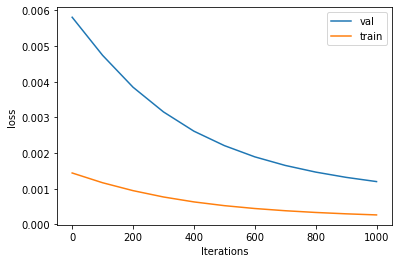

In [13]:
generations = np.linspace(0,iterations,(len(error_val)))
# print(generations)
# print(len(generations))
# print(len(error_val))
plt.plot(generations,error_val,label = "val")
plt.plot(generations,error_train,label = "train")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("loss")

## Testing 4 hidden neurons

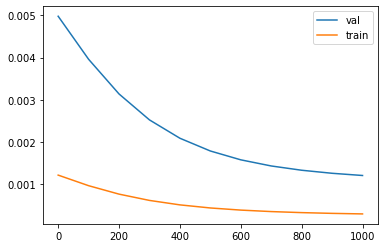

In [14]:
conf_matrix, error_train, error_val = train_and_evaluate(X_train,X_test,Y_train,Y_test,iterations)
generations = np.linspace(0,iterations,(len(error_val)))
# print(generations)
# print(len(generations))
# print(len(error_val))
plt.plot(generations,error_val,label = "val")
plt.plot(generations,error_train,label = "train")
plt.legend()

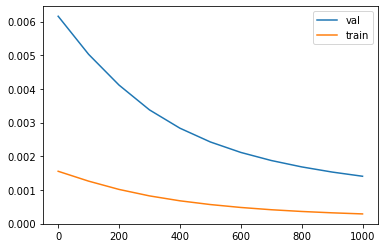

In [81]:
conf_matrix, error_train, error_val = train_and_evaluate(X_train,X_test,Y_train,Y_test,iterations,50)
generations = np.linspace(0,iterations,(len(error_val)))
# print(generations)
# print(len(generations))
# print(len(error_val))
plt.plot(generations,error_val,label = "val")
plt.plot(generations,error_train,label = "train")
plt.legend()